<h1>Importuri</h1>

In [35]:
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

<h1>Cod</h1>

In [65]:
warnings.simplefilter('ignore')

def drawGraph(G, communities, title):
    pos = nx.spring_layout(G)  # compute graph layout
    my_cmap = mcolors.ListedColormap(['red', 'green', 'blue', 'purple', 'pink', 'yellow', 'orange', 'gray'])
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=150, cmap=my_cmap, node_color=communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(title)
    plt.show()

def corelateCommunities(nodes, communities):
    ret = []
    for node in nodes:
        for i in range(len(communities)):
            if node in communities[i]:
                ret.append(i)
    return ret

def convert(nodes, community_indices):
    ret = [[] for _ in range(max(community_indices) + 1)]
    node_list = list(nodes)
    for i in range(len(community_indices)):
        ret[community_indices[i]].append(i + 1)
    return ret

def detect_communities(file_path, num_iterations):
    G = nx.read_gml(filePath, label = 'id')
    G = nx.Graph(G)

    
    # Afișarea grafului inițial
    drawGraph(G, [0] * G.number_of_nodes(), 'Graful inițial')

    # Eliminarea muchiei cu valoarea cea mai mare a centralității și afișarea grafului după fiecare iterație
    for i in range(num_iterations):
        edge_betweenness = nx.edge_betweenness_centrality(G).items()
        edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

        G.remove_edge(*edge_to_delete)

        # Afișarea grafului după fiecare iterație
        #drawGraph(G, [0] * G.number_of_nodes(), f'Iterația {i + 1} \nMuchia {edge_to_delete} eliminată')
        print(f'Iterația {i + 1} \nMuchia {edge_to_delete} eliminată')

    # Detectarea comunităților
    communities = list(nx.connected_components(G))

    print(f'Numărul de comunități: {len(communities)}')
    for i, community in enumerate(communities):
        print(f'Comunitatea {i + 1}: {sorted(community)}')

    # Corelarea comunităților
    community_indices = corelateCommunities(G.nodes(), communities)
    
    # Convertirea comunităților pentru a folosi noduri numerotate consecutiv
    converted_communities = convert(G.nodes(), community_indices)
    for i in range(len(converted_communities)):
        print('Comunitatea ', i + 1, ': ', converted_communities[i])

    # Colorarea nodurilor în funcție de comunitățile cărora le aparțin
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'pink', 'yellow', 'gray']
    color_map = []
    for node in G.nodes():
        color_map.append(colors[community_indices[list(G.nodes()).index(node)] % len(colors)])

    drawGraph(G, color_map, 'Comunitățile rezultate')

    # Calculul modularității
    network = {
        'noNodes': len(G.nodes()),
        'mat': np.array(nx.to_numpy_array(G)),
        'degrees': dict(G.degree()),
        'noEdges': len(G.edges())
    }
    mod = modularity(community_indices, network)
    print(f"Modularitatea: {mod}")

def modularity(communities, param):
    noNodes = param['noNodes']
    mat = param['mat']
    degrees = param['degrees']
    noEdges = param['noEdges']  
    M = 2 * noEdges
    Q = 0.0
    for i in range(0, noNodes):
        if i in degrees:
            ki = degrees[i]
        else:
            ki = 0
        for j in range(0, noNodes):
            if j in degrees:
                kj = degrees[j]
            else:
                kj = 0
            if (communities[i] == communities[j]):
                if i < len(mat) and j < len(mat):
                    Q += (mat[i][j] - ki * kj / M)
    return Q * 1 / M


<h1>Delfini</h1>

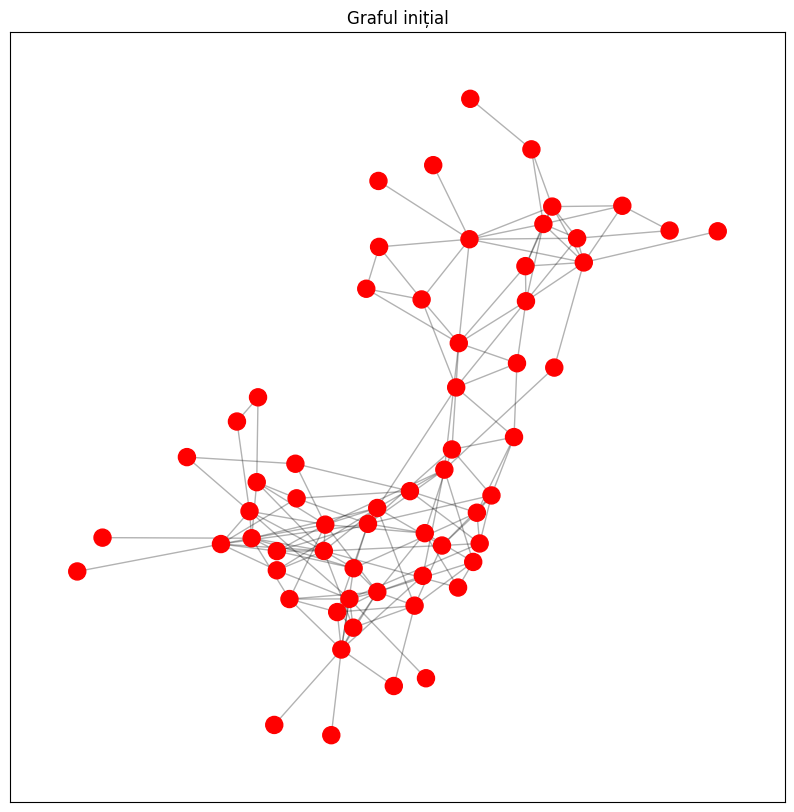

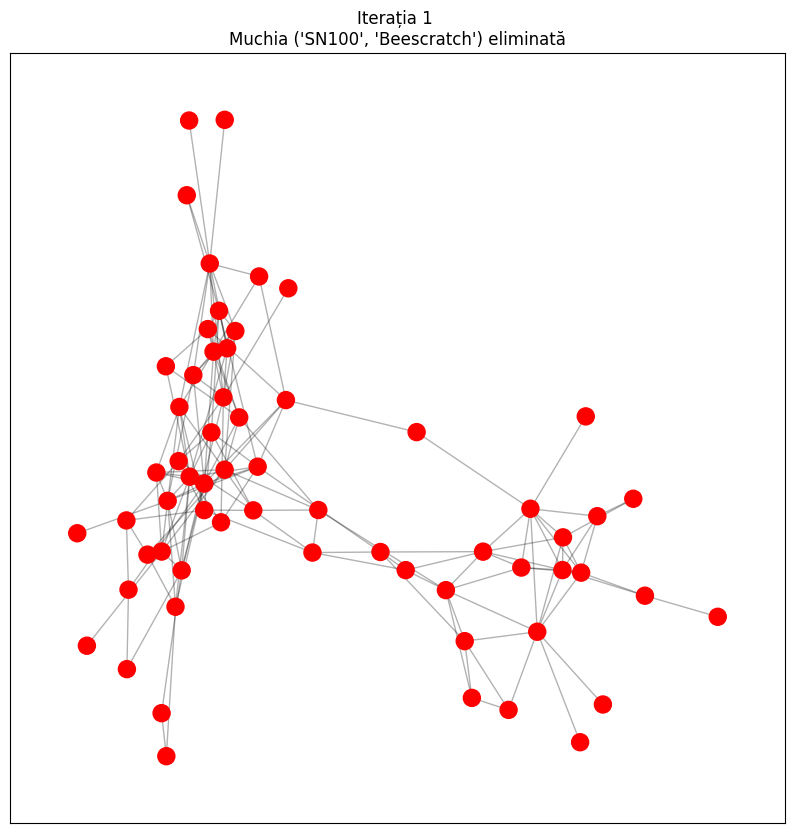

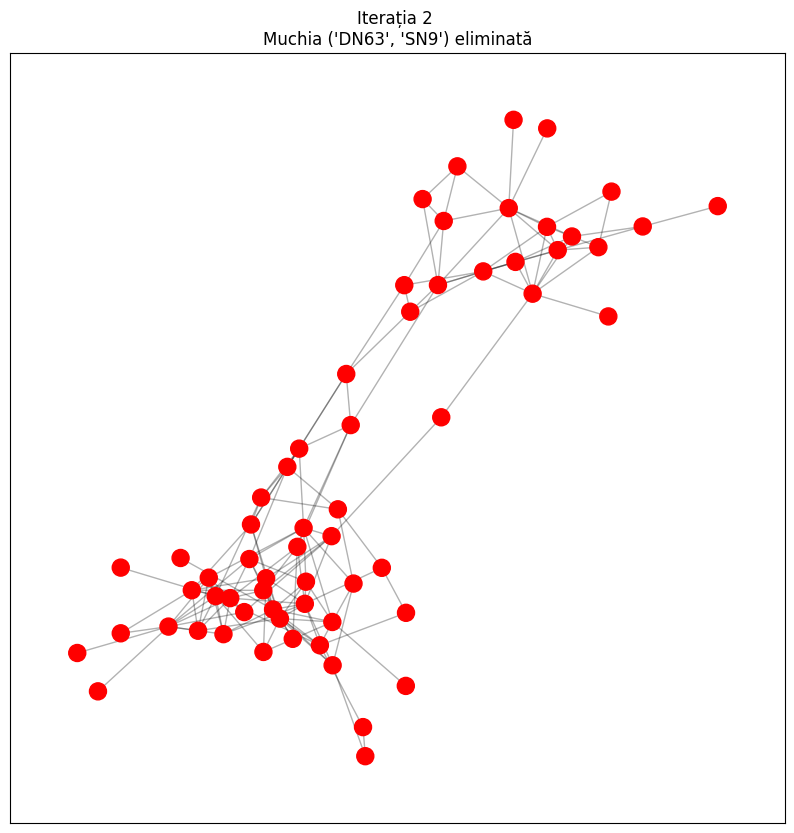

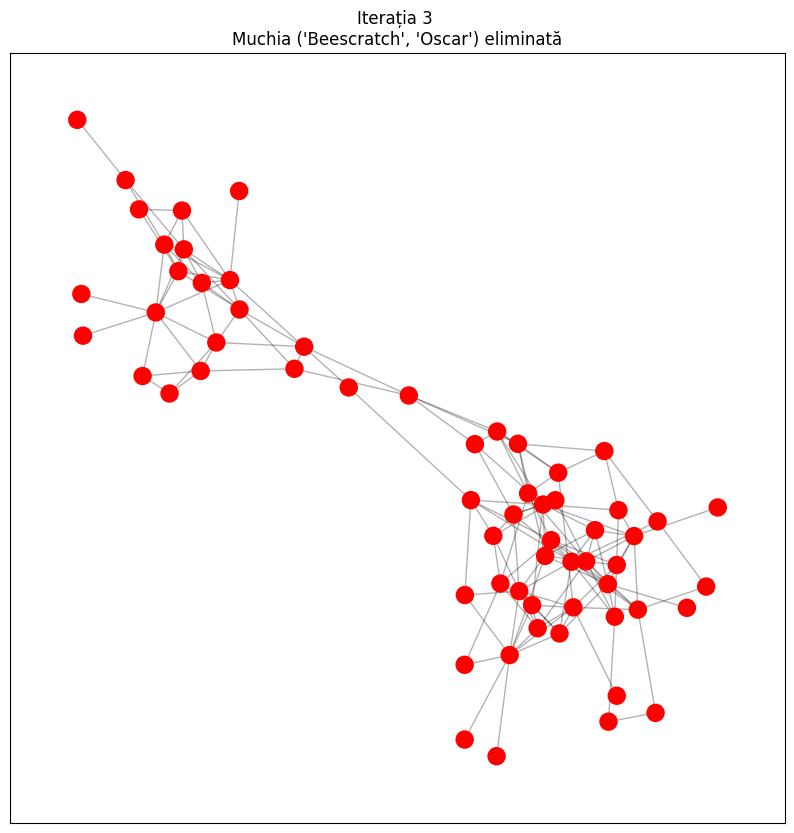

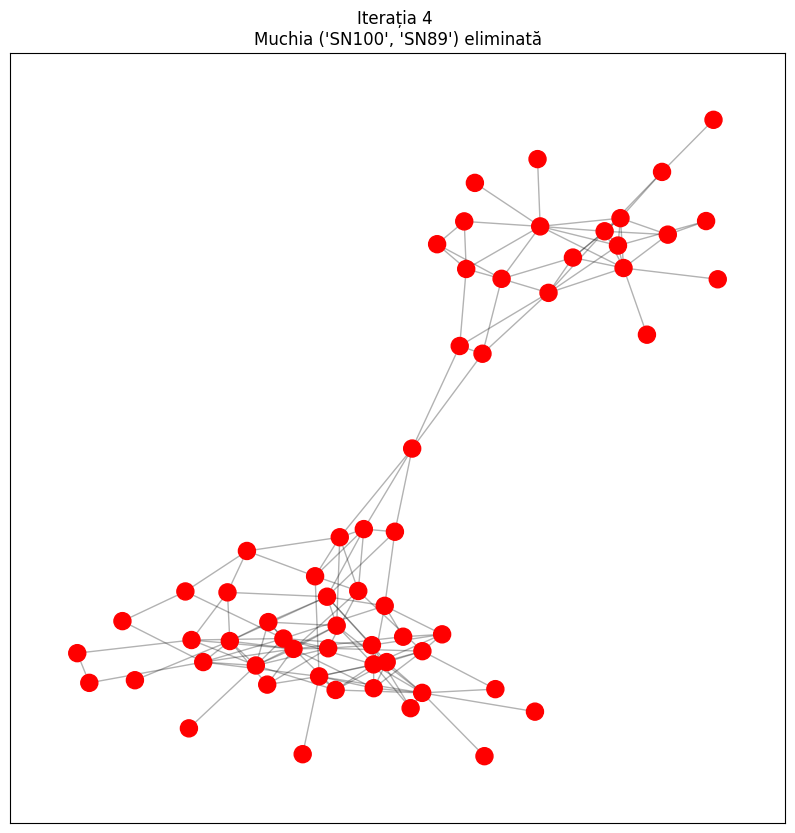

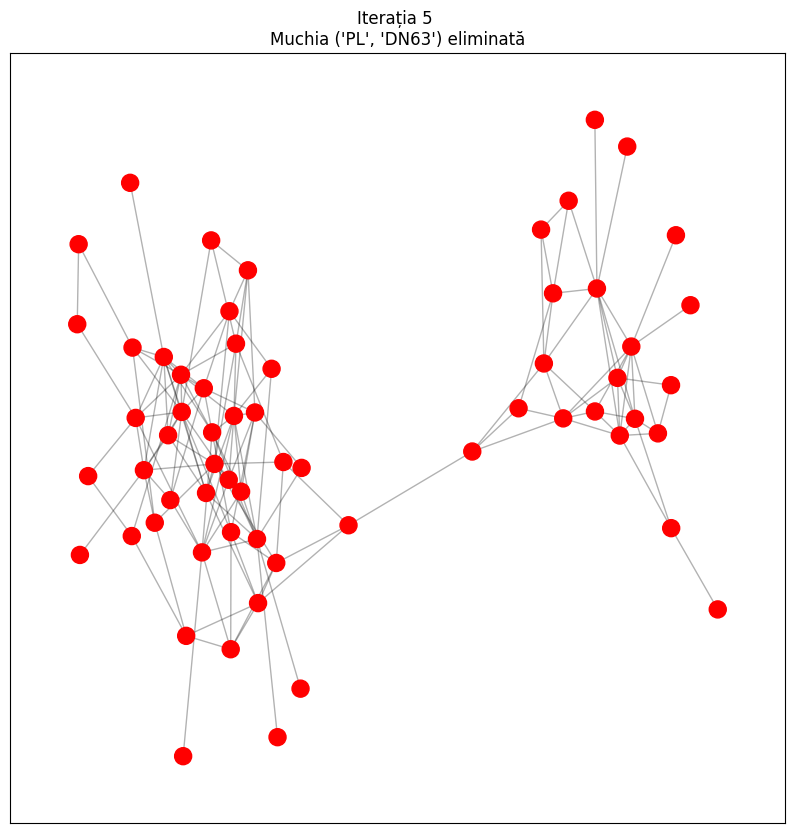

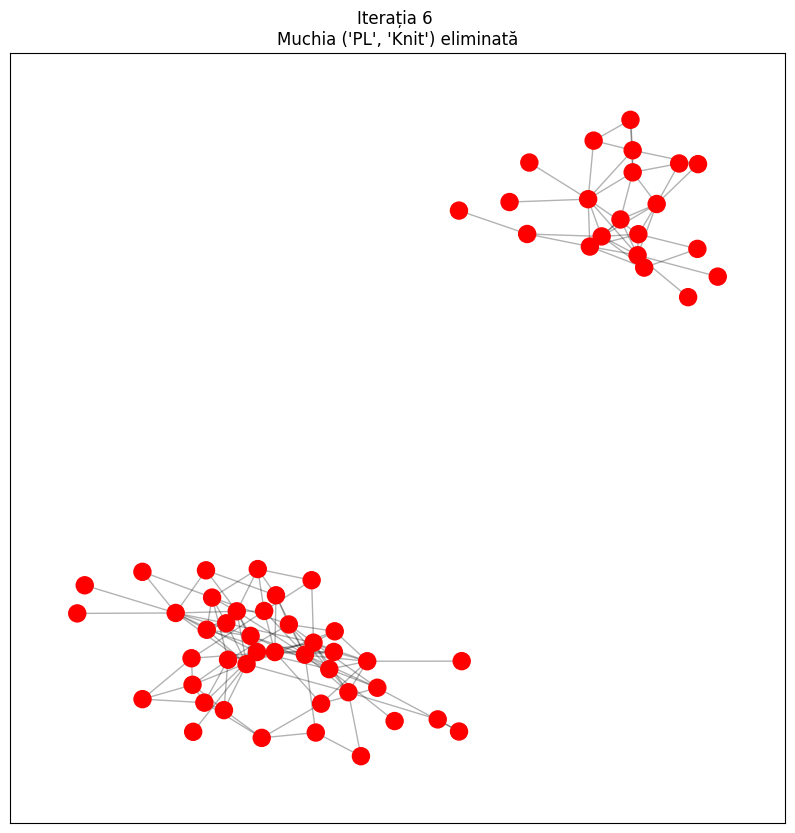

Numărul de comunități: 2
Comunitatea 1: ['Beak', 'Bumper', 'CCL', 'Cross', 'Double', 'Fish', 'Five', 'Fork', 'Grin', 'Haecksel', 'Hook', 'Jonah', 'Kringel', 'MN105', 'MN60', 'MN83', 'Oscar', 'PL', 'Patchback', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN9', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Vau', 'Whitetip', 'Zap', 'Zipfel']
Comunitatea 2: ['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Knit', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN89', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig']
Comunitatea  1 :  [1, 2, 3, 4, 5, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 44, 45, 46, 48, 49, 50, 52, 59, 60, 62]
Comunitatea  2 :  [6, 7, 12, 13, 26, 27, 28, 29, 30, 35, 40, 43, 47, 51, 53, 54, 55, 56, 57, 58, 61]


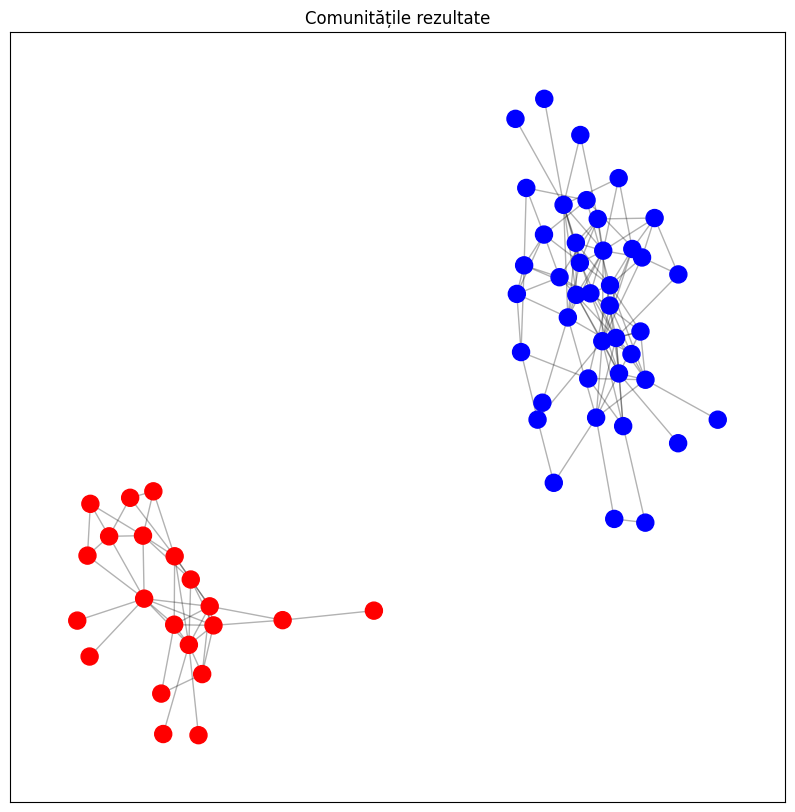

Modularitatea: 1.0


In [43]:
crtDir = os.getcwd()
file_path = 'D:/FACULTATE/SEM4/AI/Lab10/real/dolphins/dolphins.gml'
num_iterations = 6
filePath = os.path.join(crtDir, file_path)  # asigură-te că calea către fișierul gml este corectă
detect_communities(filePath, num_iterations)

<h1>Football</h1>

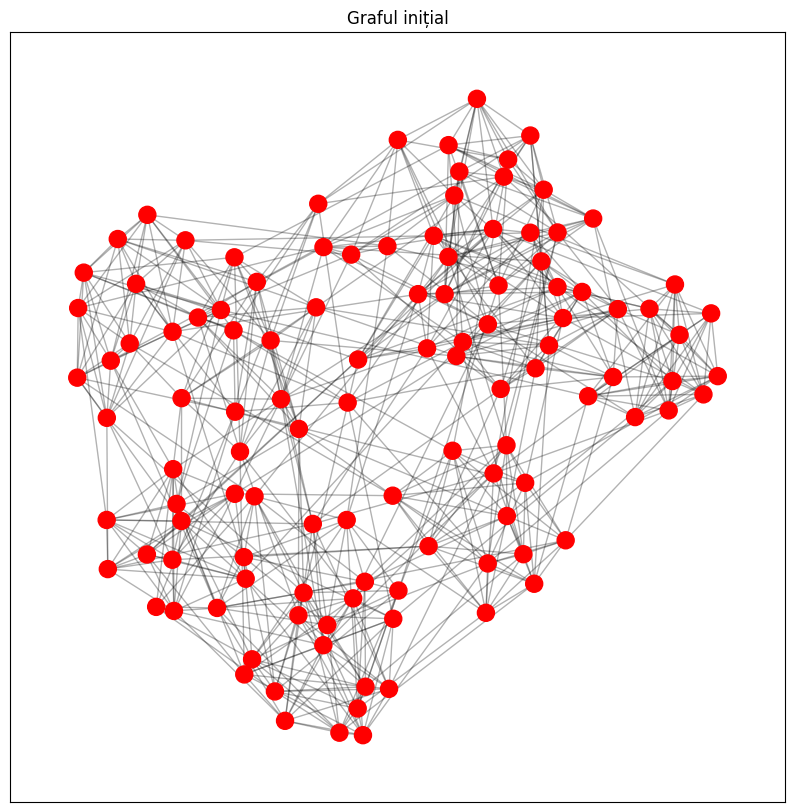

Iterația 1 
Muchia ('Alabama', 'UCLA') eliminată
Iterația 2 
Muchia ('Washington', 'MiamiFlorida') eliminată
Iterația 3 
Muchia ('Missouri', 'Clemson') eliminată
Iterația 4 
Muchia ('KansasState', 'BallState') eliminată
Iterația 5 
Muchia ('BoiseState', 'CentralMichigan') eliminată
Iterația 6 
Muchia ('Wyoming', 'CentralMichigan') eliminată
Iterația 7 
Muchia ('Ohio', 'IowaState') eliminată
Iterația 8 
Muchia ('WestVirginia', 'Idaho') eliminată
Iterația 9 
Muchia ('BrighamYoung', 'Syracuse') eliminată
Iterația 10 
Muchia ('Tulsa', 'NorthCarolina') eliminată
Iterația 11 
Muchia ('NorthCarolinaState', 'SouthernMethodist') eliminată
Iterația 12 
Muchia ('ArkansasState', 'NorthCarolinaState') eliminată
Iterația 13 
Muchia ('NewMexicoState', 'SouthCarolina') eliminată
Iterația 14 
Muchia ('BrighamYoung', 'Virginia') eliminată
Iterația 15 
Muchia ('BrighamYoung', 'FloridaState') eliminată
Iterația 16 
Muchia ('NewMexicoState', 'Georgia') eliminată
Iterația 17 
Muchia ('Navy', 'TexasChristian

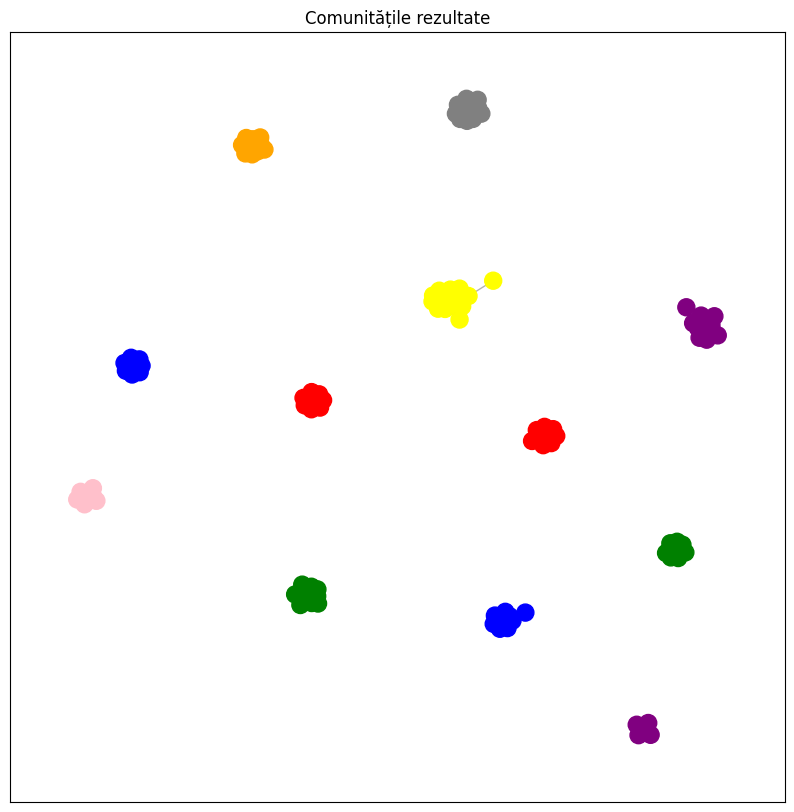

Modularitatea: 1.0


In [62]:
crtDir = os.getcwd()
file_path = 'D:/FACULTATE/SEM4/AI/Lab10/real/football/football.gml'
num_iterations = 193
filePath = os.path.join(crtDir, file_path)  # asigură-te că calea către fișierul gml este corectă
detect_communities(filePath, num_iterations)

<h1>Karate</h1>

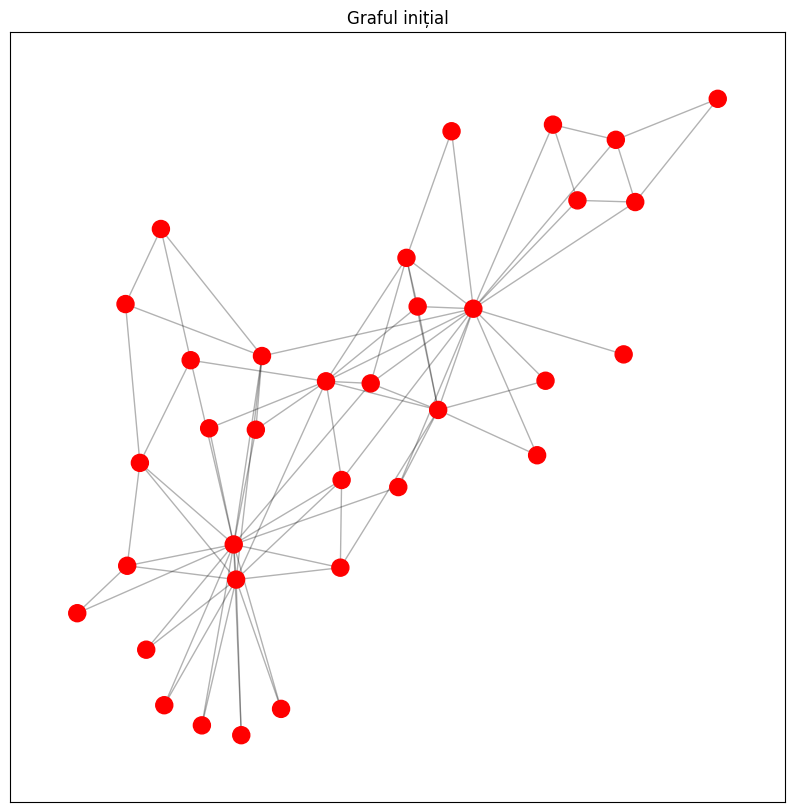

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Numărul de comunități: 2
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


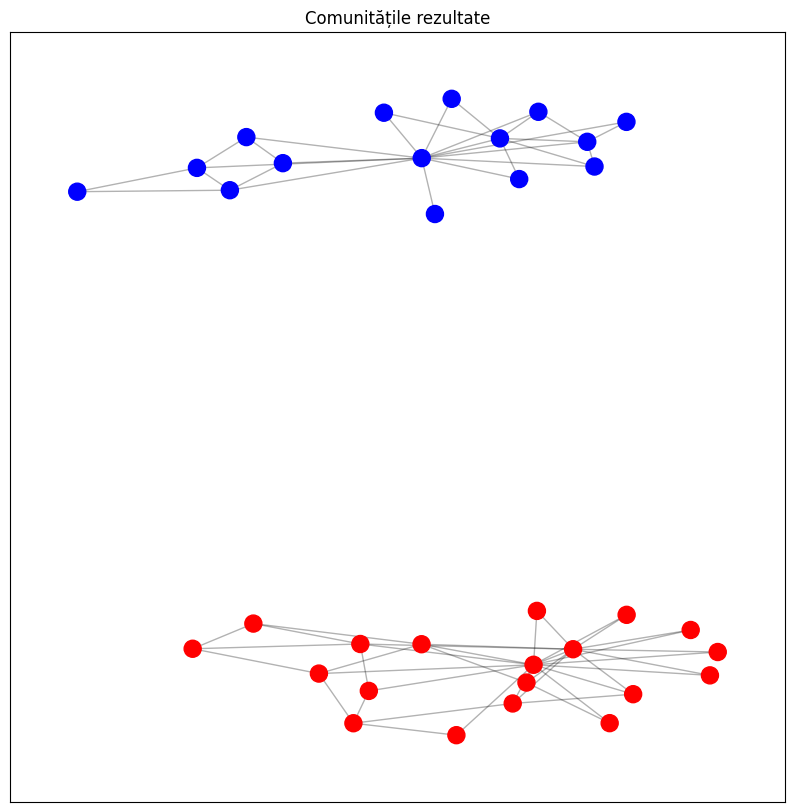

Modularitatea: 0.5933949654711513


In [71]:
crtDir = os.getcwd()
file_path = 'D:/FACULTATE/SEM4/AI/Lab10/real/karate/karate.gml'
filePath = os.path.join(crtDir, file_path)  # asigură-te că calea către fișierul gml este corectă
detect_communities(filePath, num_iterations=11)

<h1>Krebs</h1>

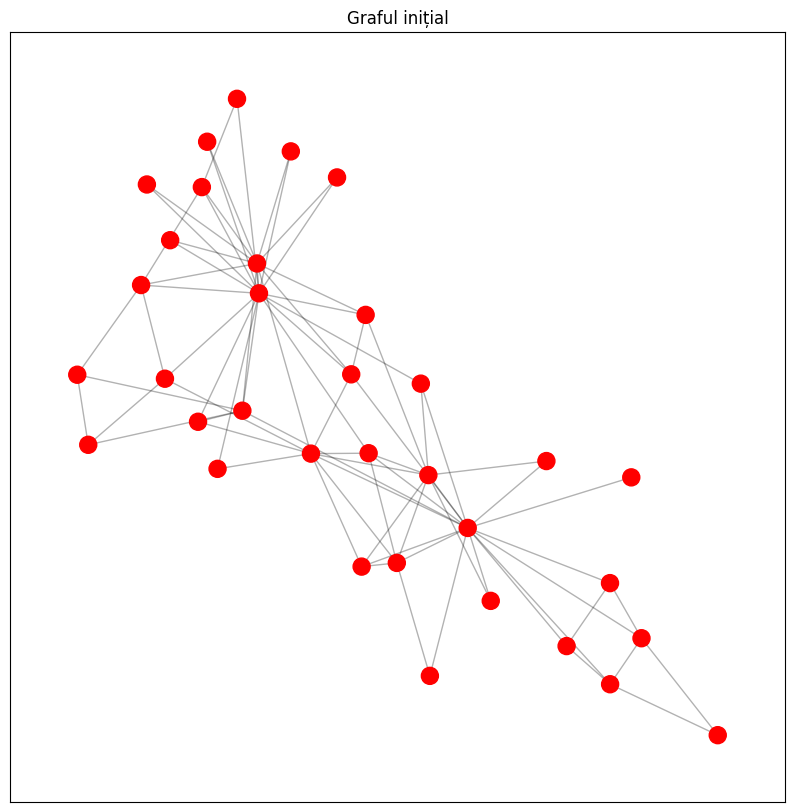

Iterația 1 
Muchia (1, 32) eliminată
Iterația 2 
Muchia (1, 3) eliminată
Iterația 3 
Muchia (1, 9) eliminată
Iterația 4 
Muchia (14, 34) eliminată
Iterația 5 
Muchia (20, 34) eliminată
Iterația 6 
Muchia (3, 33) eliminată
Iterația 7 
Muchia (2, 31) eliminată
Iterația 8 
Muchia (2, 3) eliminată
Iterația 9 
Muchia (3, 4) eliminată
Iterația 10 
Muchia (3, 8) eliminată
Iterația 11 
Muchia (3, 14) eliminată
Iterația 12 
Muchia (10, 34) eliminată
Iterația 13 
Muchia (28, 34) eliminată
Iterația 14 
Muchia (3, 10) eliminată
Numărul de comunități: 3
Comunitatea 1: [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea 2: [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea 3: [10]
Comunitatea  1 :  [1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22]
Comunitatea  2 :  [3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Comunitatea  3 :  [10]


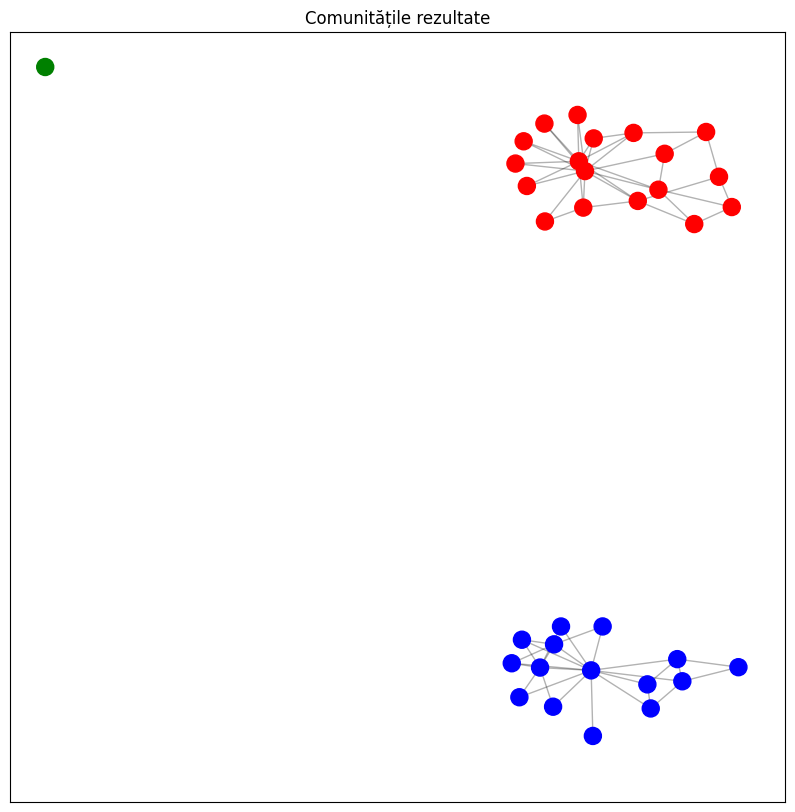

Modularitatea: 0.61199951171875


In [83]:
file_path = 'D:/FACULTATE/SEM4/AI/Lab10/real/krebs/krebs.gml'
num_iterations = 14
detect_communities(file_path, num_iterations)